*November, 12th, 2024*

S22

### **IMPORTANT NOTE:** If you are accessing this notebook directly in Colab, do not forget to create a copy and work in your own file. You can do this by selecting:

### **FILE -> Save a copy in Drive**

### This will save a copy in your own Drive space.

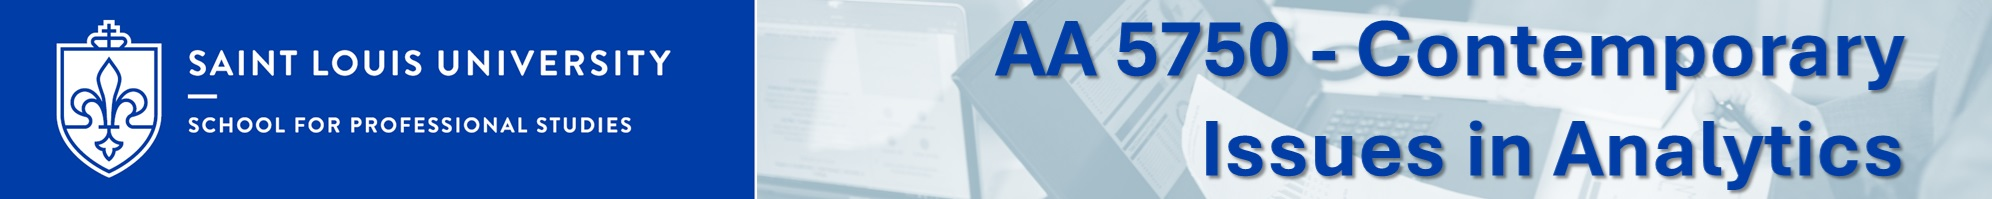

# **Week 4: Text Recognition and Natural Language Processing (NLP)**

## Part I: Vectorization using BoW and TF-IDF

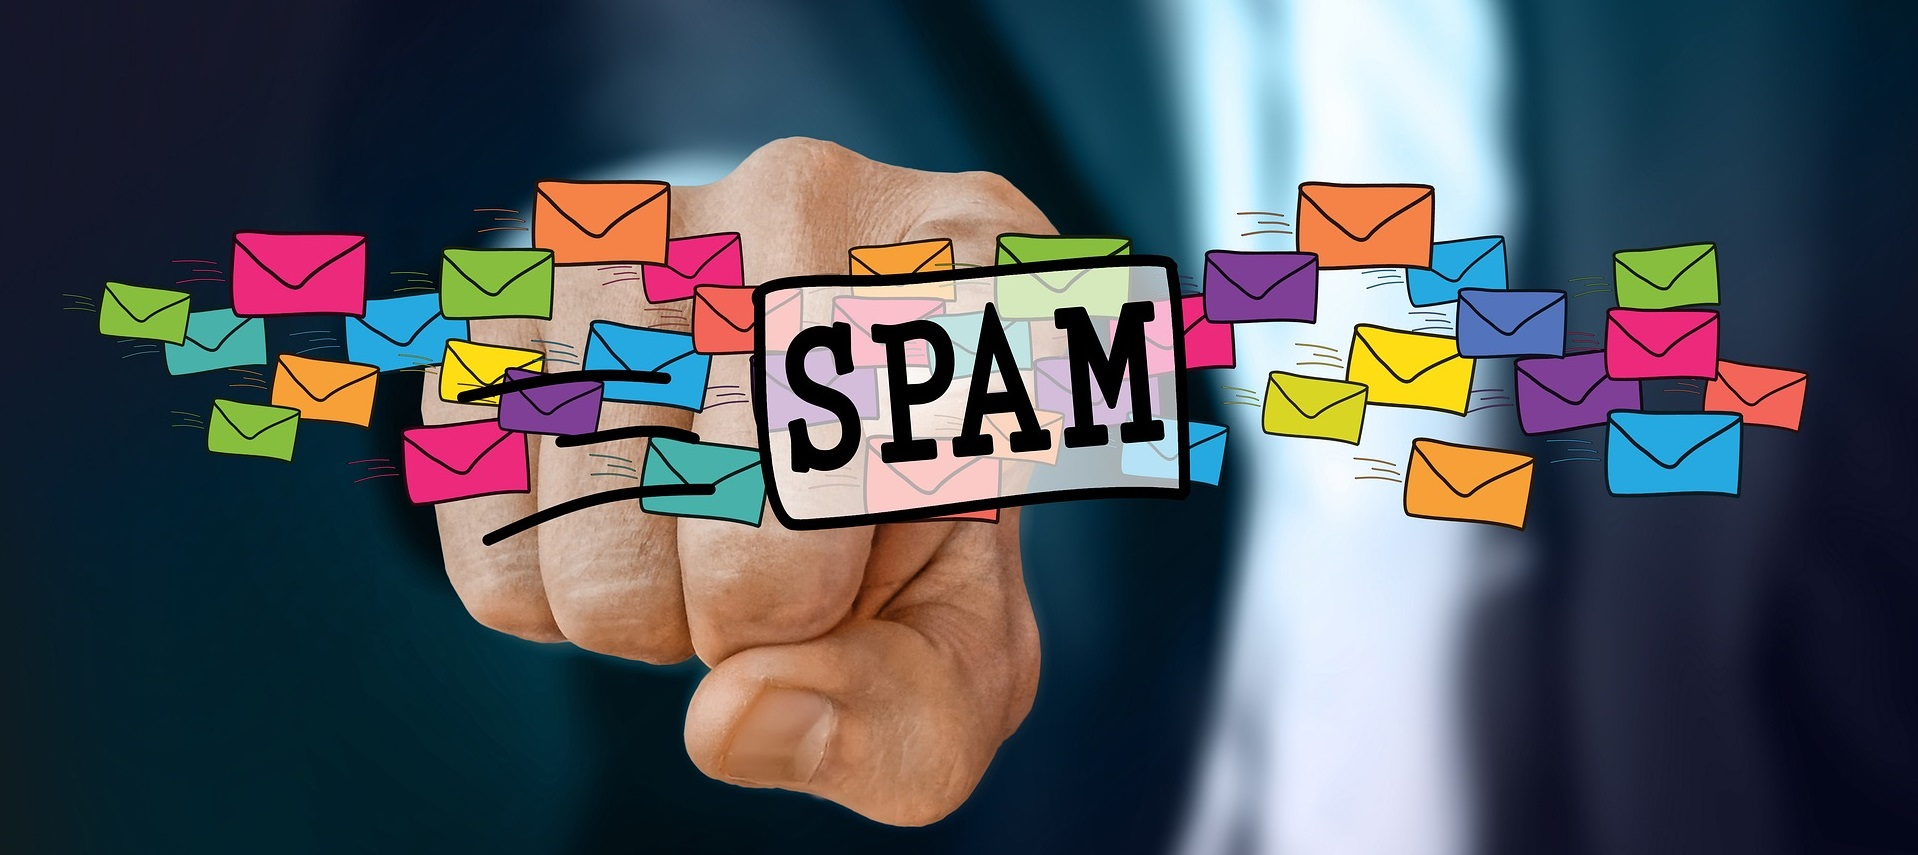

### **Goal**
To create vector representations of the text data using fundamental techniques like Bag of Words and TF-IDF, for training a classification model based on a Feedforward Neural Network.

### **Problem Overview**
People around the world heavily rely on email and text messaging for communication, making these tools vital to everyday life. Both emails and text messages often contain sensitive information, which hackers seek to access, a process referred to as data theft. Consequently, it is essential to differentiate between spam and legitimate (ham) messages.

Messages that are genuine, useful, and important to the user are classified as ham. Conversely, spam refers to fake messages sent from unreliable sources with harmful intentions. <br><br>

### **Data Description**
* **Text:** Messages sent by users
* **Type:** Target variable that indicates whether a message is classified as Spam or Ham <br><br>

**Dataset to use:** spam_ham.csv

### **Index**

1. Importing libraries
2. Uploading and understanding the datasetaset
3. Exploring the dataset
4. BoW vectorization and modeling
5. Tf-IDF vectorization and modeling
6. Conclusion




## **1. Importing the necessary libraries**

In [ ]:
# To read and manipulate the data
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# To visualise the graphs
import matplotlib.pyplot as plt
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
import seaborn as sns

# Helps to display the images (Pillow library)
from PIL import Image

# Helps to remove the punctuation
import string

# Helps to create the counter
from collections import Counter

from sklearn.model_selection import train_test_split

# Importing the vectorization classes
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.preprocessing import MinMaxScaler

# For the FfNeural Network
import tensorflow as tf
from keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

## **2. Uploading and understanding the datasetaset**

In [ ]:
from google.colab import files
# File to import: spam_ham.csv
uploaded = files.upload()

Saving spam_ham.csv to spam_ham.csv


In [ ]:
# Importing the dataset
data = pd.read_csv('/content/spam_ham.csv')

# Check the top five records of the data
data.head()

,Unnamed: 0,type,text
0,0,ham,hope having good checking
1,1,ham,dong cbe bt pay
2,2,ham,ask mummy father
3,3,ham,fyi usf swing room
4,4,ham,sure thing big hockey election longer hour


In [ ]:
# Viewing the last five rows of the dataset
data.tail(5)

,Unnamed: 0,type,text
4023,4023,spam,cd congratulation ur awarded ps500 cd gift voucher ps125 gift guaranteed reentry 2 ps100 draw xt music 87066 tn
4024,4024,spam,mobile 11myths update free orange latest colour camera mobile unlimited weekend mobile upd8 freeform 08000839402 2stoptxt
4025,4025,spam,3 lion england reply lion 4 mono lion 4 4 2 original n tone 3gb network operator rate
4026,4026,spam,ur balance ur question sang 2 answer txt ur answer good
4027,4027,spam,ac energy u know 2channel 2day ur leadership skill r reply an reply end sco


In [ ]:
# Checking the shape of the dataset
data.shape

(4028, 3)

In [ ]:
# Checking the datatypes and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4028 non-null   int64 
 1   type        4028 non-null   object
 2   text        4028 non-null   object
dtypes: int64(1), object(2)
memory usage: 94.5+ KB


In [ ]:
# There is no need to keep the Unnamed variable.
data = data.drop(columns=["Unnamed: 0"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    4028 non-null   object
 1   text    4028 non-null   object
dtypes: object(2)
memory usage: 63.1+ KB


In [ ]:
# Let's check out the number of labels "hams" and spams" in the dataset
data['type'].value_counts(normalize=True)

,proportion
type,
ham,0.847567
spam,0.152433


**Observations:**

* There are a total of 4,028 rows and 2 columns in the dataset.
* All columns are of object type.
* There are no duplicate values in the data.
* There are no null values in the dataset.
* The majority of messages (around 85%) belong to the ham class.

We have an imbalanced dataset, which can affect our model's performance. Let's examine the results in the upcoming steps.

Now, we are going to install some necessary libraries and import additional ones to perform a data cleaning step.

In [ ]:
# this library is used to expand contractions present in the text
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
# These libraries will help us to extract the data using regular expressions and
# deploying cleaning steps, as well as removing stop words.

import re
""" This is a built-in Python library used for text pattern matching and manipulation.
It's very useful for tasks like removing unwanted characters, searching for specific
patterns, and replacing text in strings. Commonly used in text preprocessing for
cleaning up input text by removing special characters, punctuation, or
formatting elements."""

import nltk
""" nltk is a comprehensive library for natural language processing (NLP) in Python.
It includes a wide range of tools for tasks like tokenization, part-of-speech tagging,
parsing, stemming, lemmatization, and more. The toolkit also provides access to a large
number of text corpora, which are used for training and analysis."""

import contractions
""" This is a separate library that handles English contractions
(e.g., "I'm" -> "I am", "don't" -> "do not"). It’s often used in text preprocessing
to expand contractions in the text, which can help standardize language and improve
the performance of NLP models, especially for tasks like sentiment analysis or
machine translation."""

# This line will download the Punkt tokenizer, which is used for sentence and word tokenization.
# This allows nltk to split text into sentences or words accurately.
nltk.download('punkt')


# This line will import all resources
nltk.download('all')

from nltk.corpus import stopwords
""" This module provides a collection of common stopwords (e.g., "is", "the", "in")
in multiple languages. Stopwords are usually removed from text data as they don’t
contribute much meaning and can reduce model performance by adding noise."""

from nltk import word_tokenize
""" word_tokenize is a function for splitting text into individual words.
This is essential for most NLP preprocessing steps, as models typically process
text at the word level."""

# Used in Lemmatization
from nltk.stem import WordNetLemmatizer
pass # WordNetLemmatizer is a tool that reduces words to their base or root form (lemma).
# Unlike stemming, lemmatization uses context to ensure that words are transformed to
# meaningful base forms (e.g., "running" -> "run" rather than "runn")."""


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downlo

Now let's create a function to clean and preprocess the text in our dataset. Remember: any symbol, letter, or word that does not add value to interpretation will increase the dimensionality of the vectorization, adding complexity and unnecessary size to the word vectors. Let's take a look:

In [ ]:
    """
    A method for cleaning and removing any unnecesary element from our text.
    """

def clean_text(df, punctuations=r'''!()-[]{};:'"\,<>./?@#$%^&*_~'''):

     """The function clean_text takes in two arguments:
     df: This is expected to be a text input, like a string, that needs cleaning.
     punctuations: A string of punctuation characters to be removed from the text,
     though it’s not directly used in the code.
     The r before the string indicates that it is a raw string in Python.
     In this example, r ensures that any backslashes (\) in the string, like \" or \,
     are treated as literal characters and not as escape sequences. This is especially
     helpful when defining sets of punctuation or other characters where backslashes
     might otherwise cause issues. """

     # Cleaning the urls
     string = re.sub(r'https?://\S+|www\.\S+', '', df)
     """ This line uses regular expressions (re.sub) to remove any URLs in the text,
     such as http://example.com or www.example.com."""

     # This line removes any HTML elements from the text. Resulst are stores in "string"
     string = re.sub(r'<.*?>', '', df)

     # Removing the punctuations using regular expression
     # i.e remove anything which is not word or whitespace character
     string = re.sub(r'[^\w\s]', '', df)
     """This line removes all punctuation from the text. [^\w\s]: Matches any
     character that is not a word character (\w) or whitespace character (\s).
     The re.sub function replaces these characters with an empty string."""

     # Converting the text to lowercase for consistency
     string = string.lower()

     # This line removes common stopwords (e.g., "the", "is", "and") from the text.
     string = ' '.join([word for word in string.split() if word not in stopwords.words('english')])
     """ - string.split() splits the text into individual words.
        - The list comprehension [word for word in string.split() if word not in
        stopwords.words('english')], keeps only the words that are not in the list
        of English stopwords.
        - ' '.join(...) joins the remaining words back into a single string."""

     # This line removes any extra spaces or line breaks in the text, leaving
     # only a single space between words.
     string = re.sub(r'\s+', ' ', string).strip()
     """
     - \s+: Matches one or more whitespace characters (spaces, tabs, newlines).
     - re.sub(..., ' ', ...): Replaces these matches with a single space.
     - .strip(): Removes any leading or trailing whitespace from the text.
     """

     # This line splits the text into individual tokens (words).
     string = word_tokenize(string)
     """ Tokenization makes each word an individual element in a list, allowing for
     easier manipulation and analysis."""

     # This line removes any tokens that contain numbers, leaving only alphabetic words.
     string=[s for s in string if s.isalpha()]

     #This line reduces each word to its base or dictionary form (lemma) using a lemmatizer.
     string= [WordNetLemmatizer().lemmatize(i) for i in string]

     #This line fix contractions (example: "'cause": "because","could've": "could have",etc)
     string = ' '.join([contractions.fix(word) for word in string])

     # Returns the cleand text
     return string


Now let's apply the "clean_text" function to our dataset and locate cleaned text in annew variable called "*cleaned_text*"

In [ ]:
data["text"] = data["text"].astype(str)                                         # Just to be sure "text" is a string
data['clean_text'] = data['text'].apply(clean_text)

In [ ]:
data.head(20)

,type,text,clean_text
0,ham,hope having good checking,hope good checking
1,ham,dong cbe bt pay,dong cbe bt pay
2,ham,ask mummy father,ask mummy father
3,ham,fyi usf swing room,fyi usf swing room
4,ham,sure thing big hockey election longer hour,sure thing big hockey election longer hour
5,ham,march problem capital far work lady,march problem capital far work lady
6,ham,hmm night night,hmm night night
7,ham,k sure noon,k sure noon
8,ham,ha ha cool cool chick,ha ha cool cool chick
9,ham,int tell angry told,int tell angry told


## **3. Exploring the dataset**

Let's have a look into the text data to understand the most frequent words -

In [ ]:
# spam messages
data_spam = data[data['type'] == 'spam']

# ham messages
data_ham = data[data['type'] == 'ham']

In [ ]:
data_spam.head(5)

,type,text,clean_text
3414,spam,complimentary 4 star biz holiday cash need urgent 09066364349 landing lose,complimentary star biz holiday cash need urgent landing lose
3415,spam,dear dave final notice collect tenerife holiday cash 09061743806 tc sae box326 cw25wx 150ppm,dear dave final notice collect tenerife holiday cash tc sae
3416,spam,marvel mobile play official ultimate game ur mobile right text spider 83338 game ll send u free 8ball wallpaper,marvel mobile play official ultimate game you are mobile right text spider game send you free wallpaper
3417,spam,u win ps100 music gift voucher week starting txt word draw 87066 sc,you win music gift voucher week starting txt word draw sc
3418,spam,u won nokia 6230 plus free digital u u win free send nokia 83383 16,you nokia plus free digital you you win free send nokia


In [ ]:
""" This function extracts the top N most frequent n-grams (sequence of words)
from a given text corpus. It can be used to analyze common word patterns,
such as the most frequent single words (unigrams), pairs of words (bigrams),
or triplets of words (trigrams). Pareameters are:
- corpus: A list of text documents (strings), each representing a piece of text to be analyzed.
- n: The number of top n-grams to return. If n is None, it returns all n-grams.
- ngram: Specifies the type of n-gram to analyze.
- ngram = 1 for unigrams (single words).
- ngram = 2 for bigrams (pairs of words).
- ngram = 3 for trigrams (triplets of words), etc.
"""

def top_n_ngram(corpus, n = None, ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    """ Initializes a CountVectorizer to count word occurrences, ignoring English
    stopwords (common words like "the", "and")."""

    bag_of_words = vec.transform(corpus)
    """ Transforms the corpus into a bag of words (sparse matrix format),
    where each entry represents the count of n-grams in each document."""

    sum_words = bag_of_words.sum(axis =0)
    """Sums the occurrences of each n-gram across all documents to get total counts."""

    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    """ Converts the total counts into a list of tuples, where each tuple is an n-gram
    and its frequency. Sorts the list in descending order of frequency."""

    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    """ Returns the top n most frequent n-grams. If n is None, it returns the
    entire sorted list."""

    return words_freq[:n]

**N-GRAMS**

<Axes: xlabel='Frequent Words in Spam Texts'>

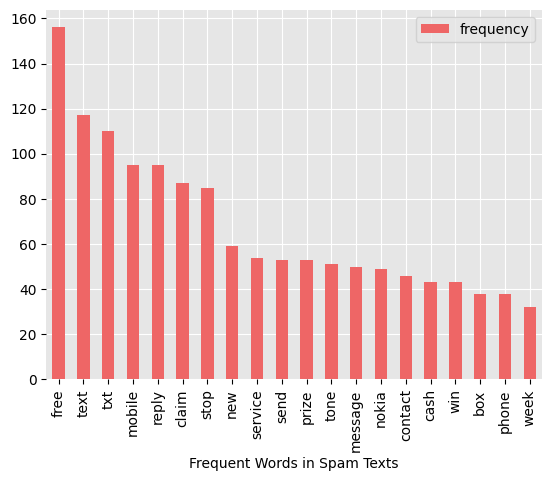

In [ ]:
# For SPAM
words1 = top_n_ngram(data_spam['clean_text'], 20, 1)                            # Will show a uni-gram (one word) for the top 20
df_s = pd.DataFrame(words1, columns=['Frequent Words in Spam Texts', 'frequency'])
df_s.plot(kind='bar', x='Frequent Words in Spam Texts')

- A few keywords such as '**Free'**, **'Claim', 'Prize', 'Cash', 'Win'**, and so on correctly indicate that the messages sometimes contains a fake prize offering and is a scam.

<Axes: xlabel='Frequent Words in Ham Texts'>

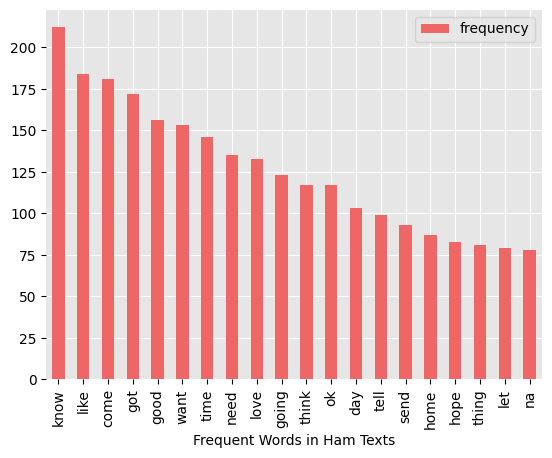

In [ ]:
# For HAM
words2 = top_n_ngram(data_ham['clean_text'], 20, 1)
df_h = pd.DataFrame(words2, columns=['Frequent Words in Ham Texts', 'frequency'])
df_h.plot(kind='bar', x='Frequent Words in Ham Texts')

- The majority of the common words here are generic here, which is obvious for 'Ham' class.

<Axes: xlabel='Frequent Words in whole Texts'>

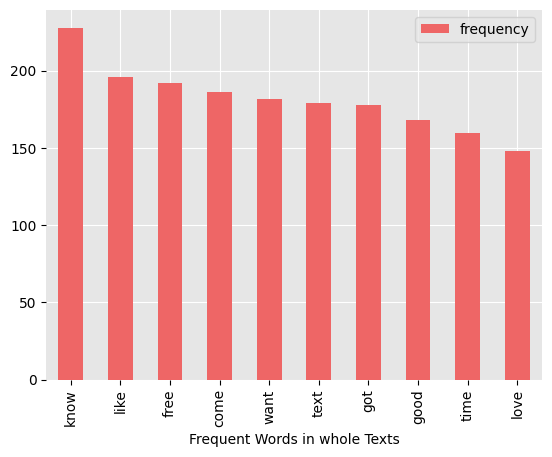

In [ ]:
# For ALL data
words3 = top_n_ngram(data['clean_text'], 10, 1)
df_w = pd.DataFrame(words3, columns=['Frequent Words in whole Texts', 'frequency'])
df_w.plot(kind='bar', x='Frequent Words in whole Texts')

- Once again, the most common words in the combined text of both Spam and ham are generic words only, which is understandable given that the majority of the entries in this dataset are of the Ham class.

Now let's create the vectors for the text data using Bag-of-Words and TF-IDF techniques.

## **4. BoW vectorization and modeling**

A bag of words is a representation of text that describes the occurrence of words within a document.

In [ ]:
# Creating the Bag of Words model
# Setting the max features to 1500

""" Line belowuses CountVectorizer from the sklearn.feature_extraction.text module in Python
to create an object cv that will transform a text corpus into a numerical
representation, specifically a bag-of-words model."""
cv = CountVectorizer(max_features = 1500)

**CountVectorizer** has several parameters that are useful to create the effective model. We mostly, use below three parameters in CountVectorizer() function.

- **ngram_range:** The lower and upper bounds of the range of n-values to be extracted for distinct n-grams. All values of n such that min_n <= n <= max_n will be used. An n gram range of (1, 1), for example, denotes just unigrams, (1, 2), unigrams and bigrams, and (2, 2), only bigrams.


- **analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’:** Whether the feature should be formed out of character n-grams or word n-grams. Option 'char wb' generates character n-grams mainly from text within word boundaries; n-grams outside of word boundaries are padded with space.


- **max_features(int), default=None:** If not None, creates a vocabulary that only considers the top max features sorted by term frequency across the corpus.


There are other parameters which can be useful for data cleaning, refer to this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">source</a> to explore more abput it.

In [ ]:
# Fitting and transforming into vectors from the text data

""" Line below applies the CountVectorizer cv to the column 'clean_text' in the
data DataFrame, transforming the text into a numerical representation and
converting it to an array."""
vectors = cv.fit_transform(data['clean_text']).toarray()

# Display the vocabulary
vocabulary = cv.get_feature_names_out()
print("Total Vocabulary:", vocabulary)
print("Vocabulary Size:", len(vocabulary))

Total Vocabulary: ['aba' 'able' 'about' ... 'yun' 'yup' 'zed']
Vocabulary Size: 1500


In [ ]:
# Printing the identified Unique words along with their indices
print("Vocabulary: ", cv.vocabulary_)
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vectors)

Vocabulary:  {'hope': 588, 'good': 523, 'checking': 219, 'cbe': 201, 'bt': 161, 'pay': 930, 'ask': 64, 'mummy': 840, 'father': 439, 'fyi': 497, 'usf': 1386, 'swing': 1280, 'room': 1086, 'sure': 1275, 'thing': 1316, 'big': 116, 'longer': 747, 'hour': 596, 'march': 779, 'problem': 1007, 'far': 435, 'work': 1465, 'lady': 687, 'hmm': 576, 'night': 861, 'noon': 864, 'ha': 543, 'cool': 274, 'chick': 222, 'int': 644, 'tell': 1300, 'angry': 38, 'told': 1333, 'you': 1495, 'wan': 1414, 'come': 251, 'din': 341, 'coming': 253, 'gym': 542, 'birthday': 122, 'wish': 1454, 'reading': 1038, 'gun': 540, 'nan': 846, 'eating': 386, 'sent': 1136, 'score': 1113, 'think': 1317, 'thinking': 1318, 'cost': 277, 'contact': 268, 'school': 1112, 'expensive': 422, 'one': 891, 'read': 1037, 'love': 757, 'need': 851, 'stop': 1247, 'sup': 1270, 'are': 55, 'today': 1332, 'plan': 953, 'train': 1347, 'wine': 1451, 'sleep': 1185, 'fri': 488, 'said': 1098, 'cannot': 189, 'wait': 1407, 'hear': 563, 'text': 1306, 'oh': 886, 

In [ ]:
vectors.shape

(4028, 1500)

So, the shape (4028, 1500) indicates that:

* a) There are 4028 documents in the dataset (4028 rows)
* b) Each document is represented by a vector of length 1500, where each element represents the count of a specific word from the 1500 most frequent words in the corpus.

In summary, the 4028 comes from the total number of rows (documents) in your dataset that CountVectorizer processed.

**Model Building**

In [ ]:
# Independent feature
X = vectors

# Target feature
y = data["type"].map({'ham':0,'spam':1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [ ]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (3222, 1500)
Shape of test set :  (806, 1500)
Percentage of classes in training set:
type
0    0.84761
1    0.15239
Name: proportion, dtype: float64
Percentage of classes in test set:
type
0    0.847395
1    0.152605
Name: proportion, dtype: float64


**Let's create a Feedforward neural Network for clasifying ham's and spam messages, usong the vectorization created using Bag of Words.**

In [ ]:
# We will create a model called model_bow as we are using the vectorization of
# BoW as inpout for our classification model (based on a FFNN)

model_bow = Sequential()
model_bow.add(Dense(16, activation='relu', input_shape=(1500,)))
""" In your model architecture, the input_shape should match the number of features
in X_train, which is the number of columns in your BoW vectorization (vectors).
Since you have defined vectors with cv.fit_transform(data['clean_text']).toarray() and
cv is limited to max_features=1500, the input shape for the model should be (1500,)"""
model_bow.add(Dense(32, activation='relu'))
model_bow.add(Dense(64, activation='relu'))
model_bow.add(Dense(128, activation='relu'))
model_bow.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling and summarizing our model
model_bow.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_bow.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          24,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,121 (137.19 KB)

 Trainable params: 35,121 (137.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's train our model
# Before training, we will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_1 = model_bow.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
91/91 - 3s - 36ms/step - accuracy: 0.8506 - loss: 0.4007 - val_accuracy: 0.9288 - val_loss: 0.2282
Epoch 2/100
91/91 - 0s - 3ms/step - accuracy: 0.9607 - loss: 0.1296 - val_accuracy: 0.9690 - val_loss: 0.1160
Epoch 3/100
91/91 - 0s - 3ms/step - accuracy: 0.9828 - loss: 0.0521 - val_accuracy: 0.9690 - val_loss: 0.1309
Epoch 4/100
91/91 - 0s - 3ms/step - accuracy: 0.9917 - loss: 0.0275 - val_accuracy: 0.9628 - val_loss: 0.1476
Epoch 5/100
91/91 - 0s - 4ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9598 - val_loss: 0.1477
Epoch 6/100
91/91 - 0s - 3ms/step - accuracy: 0.9966 - loss: 0.0112 - val_accuracy: 0.9536 - val_loss: 0.1725
Epoch 7/100
91/91 - 0s - 3ms/step - accuracy: 0.9979 - loss: 0.0093 - val_accuracy: 0.9598 - val_loss: 0.1673
Epoch 8/100
91/91 - 0s - 3ms/step - accuracy: 0.9983 - loss: 0.0077 - val_accuracy: 0.9628 - val_loss: 0.1624
Epoch 9/100
91/91 - 0s - 3ms/step - accuracy: 0.9983 - loss: 0.0076 - val_accuracy: 0.9567 - val_loss: 0.1726
Epoch 10/

As we have trained our model for 100 epochs or 'trials,' we can see the accuracy reached at the end of the training. We can compare this training accuracy with the corresponding validation set accuracy (val_accuracy) to verify overfitting once the training process finishes.

The process took ~ 33 seconds.

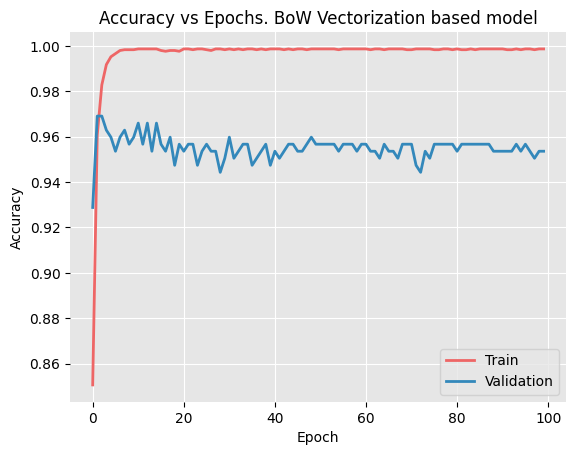

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs. BoW Vectorization based model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Let's calculate the accuracy for the test set and also construct a confusion matrix and a classification report.

In [ ]:
model_bow.evaluate(X_test, y_test, verbose = 1)
model_bow_test_pred = np.round(model_bow.predict(X_test))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.2624 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Results for model_bow TEST
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       683
           1       0.97      0.83      0.89       123

    accuracy                           0.97       806
   macro avg       0.97      0.91      0.94       806
weighted avg       0.97      0.97      0.97       806



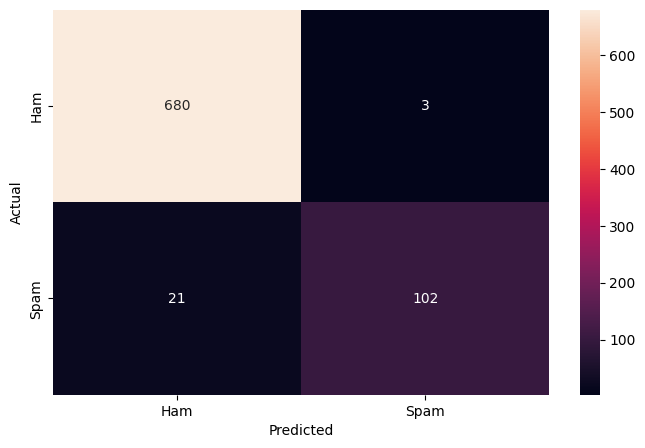

In [ ]:
print('======================================================================================================================')
print('Results for model_bow TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_bow_test_pred))
cm = confusion_matrix(y_test, model_bow_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We have trained a model with strong performance (accuracy of 97%, recall of 92%, and an F1-score of 95%). Since the vectorization obtained using Bag of Words seems effective for identification, let's examine the results of a model trained using TF-IDF vectorization.

## **5. Tf-IDF vectorization and modeling**


**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. The TF-IDF vectorization process calculates the **TF-IDF score for each word in your corpus relative to the document it appears in, storing the result as a vector**. <br> <br>

**Term Frequency (TF)** - This measures the frequency of a word within each report in the corpus. It is calculated as the ratio of the word’s occurrences in a document to the total words in that document. This value grows as the word appears more often in the report. <br> <br>

**Inverse Document Frequency (IDF)** - This part reflects how common or rare a word is across all reports in the corpus. Rare words that occur less frequently in the entire corpus are assigned a high IDF score. <br> <br>

Combining these two values provides the TF-IDF score for a term in a document within the corpus.

In [ ]:
# Let's creeate the Tf-IDF base vectorization. selecting again a maximum of 1500 words
# We will use the TfidfVectorizer class from sklearn and we will create the vectorizer object
# called "vectorizer_tfidf"

vectorizer_tfidf = TfidfVectorizer(max_features = 1500)

**TfidfVectorizer** has several parameters that are useful to create the effective model. We mostly, use below three parameters in TfidfVectorizer() function.

- **ngram_range:** The lower and upper bounds of the range of n-values to be extracted for various n-grams. All values of n such that min_n <= n <= max_n will be used. An ngram range of (1, 1), for example, denotes just unigrams, (1, 2) means unigrams and bigrams, and (2, 2), only bigrams.

- **max_df(float or int), default=1.0**: When creating the vocabulary, it excludes terms with a document frequency that is strictly greater than the given threshold (corpus-specific stop words). The parameter represents a proportion of documents if it is a float in the range [0.0, 1.0], otherwise it is an integer absolute count. If vocabulary is not None, this parameter is ignored.


- **max_features(int), default=None:** If not None, it creates a vocabulary that only considers the top max features arranged by term frequency across the corpus.


There are other parameters which can be useful for data cleaning, refer to this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">source</a> to explore more on it.

In [ ]:
# fit and transforming into vectors from the text data
tf_vectors = vectorizer_tfidf.fit_transform(data['clean_text']).toarray()

In [ ]:
# get indexing
print('\nWord indexes:')
print(vectorizer_tfidf.vocabulary_)

# tf-idf values
print('\ntf-idf values:')
print(tf_vectors)


Word indexes:
{'hope': 588, 'good': 523, 'checking': 219, 'cbe': 201, 'bt': 161, 'pay': 930, 'ask': 64, 'mummy': 840, 'father': 439, 'fyi': 497, 'usf': 1386, 'swing': 1280, 'room': 1086, 'sure': 1275, 'thing': 1316, 'big': 116, 'longer': 747, 'hour': 596, 'march': 779, 'problem': 1007, 'far': 435, 'work': 1465, 'lady': 687, 'hmm': 576, 'night': 861, 'noon': 864, 'ha': 543, 'cool': 274, 'chick': 222, 'int': 644, 'tell': 1300, 'angry': 38, 'told': 1333, 'you': 1495, 'wan': 1414, 'come': 251, 'din': 341, 'coming': 253, 'gym': 542, 'birthday': 122, 'wish': 1454, 'reading': 1038, 'gun': 540, 'nan': 846, 'eating': 386, 'sent': 1136, 'score': 1113, 'think': 1317, 'thinking': 1318, 'cost': 277, 'contact': 268, 'school': 1112, 'expensive': 422, 'one': 891, 'read': 1037, 'love': 757, 'need': 851, 'stop': 1247, 'sup': 1270, 'are': 55, 'today': 1332, 'plan': 953, 'train': 1347, 'wine': 1451, 'sleep': 1185, 'fri': 488, 'said': 1098, 'cannot': 189, 'wait': 1407, 'hear': 563, 'text': 1306, 'oh': 886

In [ ]:
tf_vectors.shape

(4028, 1500)

In [ ]:
# Let's create our X and y sets for the Tf-IDF vectorization
# Independent feature
X = tf_vectors

# Target feature
y = data["type"].map({'ham':0,'spam':1})

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

In [ ]:
# Let's see the number of rows in each sample created

print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (3222, 1500)
Shape of test set :  (806, 1500)
Percentage of classes in training set:
type
0    0.84761
1    0.15239
Name: proportion, dtype: float64
Percentage of classes in test set:
type
0    0.847395
1    0.152605
Name: proportion, dtype: float64


**Let's create a Feedforward neural Network for clasifying ham's and spam messages, usong the vectorization created using TF-IDF. We will use the same architecture**

In [ ]:
# We will create a model called model_tf as we are using the vectorization of
# Tf-IDF as input for our classification model (based on a FFNN)

model_tf = Sequential()
model_tf.add(Dense(16, activation='relu', input_shape=(1500,)))
""" In your model architecture, the input_shape should match the number of features
in X_train, which is the number of columns in your BoW vectorization (vectors).
Since you have defined vectors with cv.fit_transform(data['clean_text']).toarray() and
cv is limited to max_features=1500, the input shape for the model should be (1500,)"""
model_tf.add(Dense(32, activation='relu'))
model_tf.add(Dense(64, activation='relu'))
model_tf.add(Dense(128, activation='relu'))
model_tf.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling and summarizing our model
model_tf.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model_tf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 16)                  │          24,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,121 (137.19 KB)

 Trainable params: 35,121 (137.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Let's train our model
# Before training, we will deploy some lines of code to measure the training time required by this architecture.

import time
start_time = time.time()

history_2 = model_tf.fit(X_train,
                    y_train,
                    validation_split=0.1,
                    batch_size=32,
                    epochs=100,
                    verbose=2)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/100
91/91 - 6s - 67ms/step - accuracy: 0.8382 - loss: 0.4360 - val_accuracy: 0.8483 - val_loss: 0.2756
Epoch 2/100
91/91 - 0s - 5ms/step - accuracy: 0.9220 - loss: 0.1745 - val_accuracy: 0.9598 - val_loss: 0.1416
Epoch 3/100
91/91 - 1s - 6ms/step - accuracy: 0.9776 - loss: 0.0741 - val_accuracy: 0.9598 - val_loss: 0.1161
Epoch 4/100
91/91 - 1s - 8ms/step - accuracy: 0.9890 - loss: 0.0395 - val_accuracy: 0.9659 - val_loss: 0.1377
Epoch 5/100
91/91 - 0s - 5ms/step - accuracy: 0.9938 - loss: 0.0237 - val_accuracy: 0.9721 - val_loss: 0.1296
Epoch 6/100
91/91 - 0s - 4ms/step - accuracy: 0.9962 - loss: 0.0170 - val_accuracy: 0.9690 - val_loss: 0.1414
Epoch 7/100
91/91 - 1s - 7ms/step - accuracy: 0.9969 - loss: 0.0132 - val_accuracy: 0.9721 - val_loss: 0.1350
Epoch 8/100
91/91 - 1s - 6ms/step - accuracy: 0.9969 - loss: 0.0123 - val_accuracy: 0.9721 - val_loss: 0.1358
Epoch 9/100
91/91 - 0s - 3ms/step - accuracy: 0.9979 - loss: 0.0097 - val_accuracy: 0.9721 - val_loss: 0.1390
Epoch 10/

As we have trained our model for 100 epochs or 'trials,' we can see the accuracy reached at the end of the training. We can compare this training accuracy with the corresponding validation set accuracy (val_accuracy) to verify overfitting once the training process finishes.

The process took ~ 33 seconds.

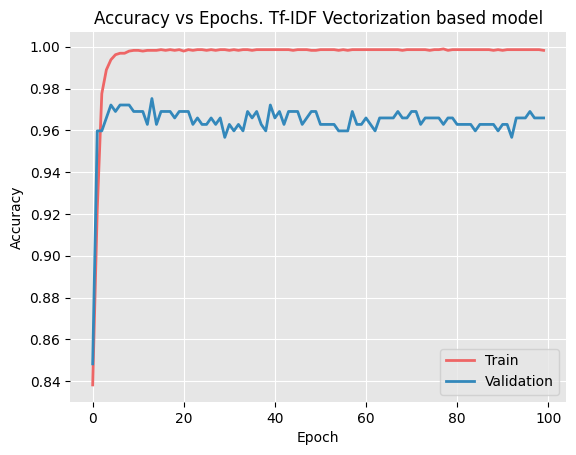

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs. Tf-IDF Vectorization based model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Let's calculate the accuracy for the test set and also construct a confusion matrix and a classification report.

In [ ]:
model_tf.evaluate(X_test, y_test, verbose = 1)
model_tf_test_pred = np.round(model_tf.predict(X_test))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.1498 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Results for model_Tf-IDF TEST
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       683
           1       0.93      0.80      0.86       123

    accuracy                           0.96       806
   macro avg       0.95      0.90      0.92       806
weighted avg       0.96      0.96      0.96       806



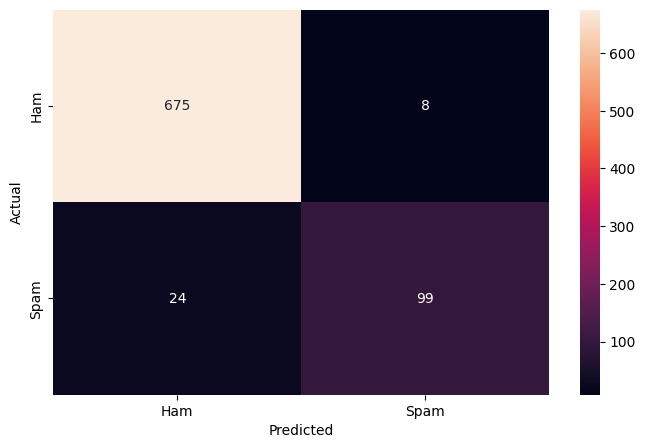

In [ ]:
print('======================================================================================================================')
print('Results for model_Tf-IDF TEST')
print('======================================================================================================================')
print(classification_report(y_test, model_tf_test_pred))
cm = confusion_matrix(y_test, model_tf_test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We have trained a model with strong performance (accuracy of 96%, recall of 91%, and an F1-score of 92%). Vectorization based on  TF-IDF seems to be slightly better for training a classification model based on A FFNN.

## **6. Conclusion**

We successfully developed a model capable of identifying messages as either spam or ham.
The vectors generated using the Bag of Words approach achieved a 96% macro average score on the test set. Additionally, the precision and recall scores for class 1 were better balanced.
Similar to Bag of Words, the TFIDF approach produced an 95% macro average score on the test set. However, the Recall and Precision (84% and 86%) for class 1 are lower than the corresponding measures (Recall: 85% and Precision: 91%)   achieved by the model with Bag of Words vectors.

Hence, for this dataset, Bag of Words seems to be more precise than Tf-IDF.

## **END OF THE NOTEBOOK**